In [2]:
import pandas as pd

Source des données : exporter les liens du graphe
http://toflit18.medialab.sciences-po.fr/#/exploration/network?classification=partner_grouping&sourceType=Best%20Guess%20national%20customs%20region&kind=total&dateMin=1789&dateMax=1789&nodeSize=flows&edgeSize=flows&labelThreshold=5&labelSizeRatio=2

In [81]:
edges = pd.read_csv("TOFLIT18_Product_terms_edges_2021-04-06_17 16 26.csv")

In [82]:
edges["source"]

0          $d$Châlons
1        $d$Marseille
2      $d$Charleville
3      $d$Montpellier
4        $d$Marseille
            ...      
213         $d$France
214         $d$France
215          $d$Rouen
216        $d$Flandre
217     $d$Saint-Malo
Name: source, Length: 218, dtype: object

In [83]:
edges["source"] = edges.source.str[3:]
edges["source"]

0          Châlons
1        Marseille
2      Charleville
3      Montpellier
4        Marseille
          ...     
213         France
214         France
215          Rouen
216        Flandre
217     Saint-Malo
Name: source, Length: 218, dtype: object

In [84]:
edges["target"] = edges.target.str[3:]
edges["target"]

0                                       Nord
1                                     Italie
2                                     Italie
3                                     Italie
4                                    Espagne
                       ...                  
213                                  Espagne
214    Flandre et autres états de l'Empereur
215                                   Suisse
216                                   Suisse
217    Flandre et autres états de l'Empereur
Name: target, Length: 218, dtype: object

In [85]:
! pip install matplotlib

In [86]:
! pip install seaborn

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
sns.set_style("white")

In [89]:
flux = edges.pivot("source", "target", "value").fillna(0)

In [90]:
flux["total"] = flux.sum(axis=1)

In [91]:
percent_target = flux.div(flux.total, axis=0)*100

In [92]:
percent_target

target,????,Afrique,Allemagne,Amériques,Angleterre,Divers,Espagne,Flandre et autres états de l'Empereur,France,Hollande,Italie,Levant et Barbarie,Monde,Nord,Portugal,Suisse,États-Unis d'Amérique,total
source,,,,,,,,,,,,,,,,,,
Amiens,0.000000,0.000000,0.000000,5.049140,78.990056,0.000000,9.186556,0.067877,1.262376,0.906399,0.000000,0.000000,0.000000,0.096667,4.222320,0.000000,0.218608,100.0
Auch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
Bayonne,0.000000,0.000000,3.487109,6.746976,0.074011,0.000000,65.388374,1.174947,14.891055,2.234871,0.000000,0.000000,0.000000,4.876710,0.931888,0.000000,0.194060,100.0
Besançon,0.000000,0.000000,50.872585,0.000000,0.000000,0.000000,0.000000,0.005875,25.436113,0.000000,0.325618,0.000000,0.000000,0.000000,0.000000,23.359810,0.000000,100.0
Bordeaux,0.000000,2.068888,0.000340,45.359233,5.863475,0.000000,1.509333,0.778624,0.617866,4.120863,0.002464,0.000176,29.844298,7.667335,0.001648,0.000560,2.164897,100.0
Caen,0.000000,0.000000,0.000000,2.347841,92.520366,0.000000,0.000000,0.000000,4.667625,0.003711,0.000000,0.000000,0.000000,0.460457,0.000000,0.000000,0.000000,100.0
Charleville,0.000000,0.000000,51.500238,0.000000,1.855349,3.660933,0.000000,19.687194,20.217856,1.025625,0.445870,0.000000,0.000000,1.095872,0.000000,0.511063,0.000000,100.0
Châlons,0.000000,0.000000,58.240812,0.000000,0.000000,0.000000,0.000000,7.324935,24.725667,0.000000,0.443370,0.019159,0.000000,4.211983,0.000000,5.034074,0.000000,100.0
Dunkerque,0.000000,3.270415,0.000000,96.729585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0


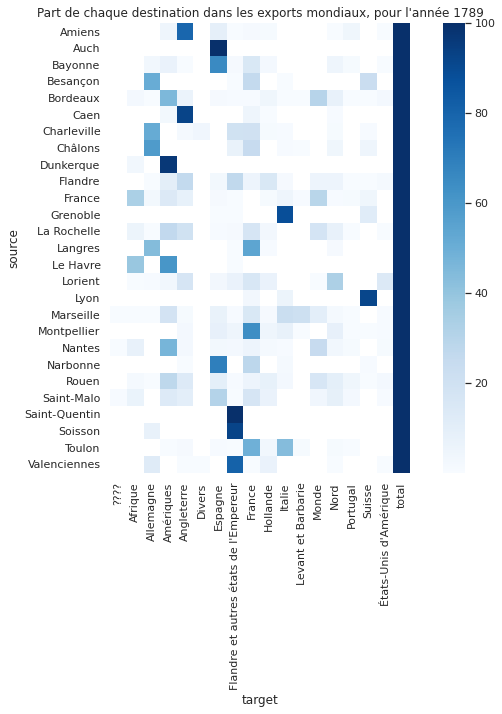

In [105]:
ax = sns.heatmap(percent_target, cmap="Blues", square = True, mask=(percent_target==0))
plt.title("Part de chaque destination dans les exports mondiaux, pour l'année 1789")
plt.show()

In [94]:
flux = edges.pivot("source", "target", "value").fillna(0)

In [95]:
flux = edges.pivot("source", "target", "value").fillna(0).transpose()

In [96]:
flux["total"] = flux.sum(axis=1)

In [97]:
percent_source = flux.div(flux.total, axis=0)*100

In [98]:
percent_source = percent_source.transpose()

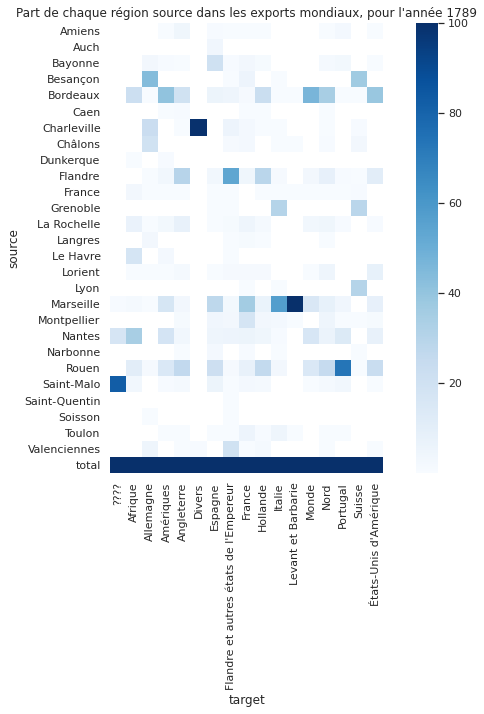

In [104]:
ax = sns.heatmap(percent_source, cmap="Blues", square = True, mask=(percent_source==0))
plt.title("Part de chaque région source dans les exports mondiaux, pour l'année 1789")
plt.show()

In [74]:
percent_source

source,$d$Amiens,$d$Auch,$d$Bayonne,$d$Besançon,$d$Bordeaux,$d$Caen,$d$Charleville,$d$Châlons,$d$Dunkerque,$d$Flandre,...,$d$Montpellier,$d$Nantes,$d$Narbonne,$d$Rouen,$d$Saint-Malo,$d$Saint-Quentin,$d$Soisson,$d$Toulon,$d$Valenciennes,total
target,,,,,,,,,,,,,,,,,,,,,
$c$????,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,17.002248,0.000000,0.000000,82.484907,0.000000,0.000000,0.000000,0.000000,100.0
$c$Afrique,0.000000,0.000000,0.000000,0.000000,22.067304,0.000000,0.000000,0.000000,0.196950,0.000000,...,0.000000,34.602010,0.000000,10.741449,3.379449,0.000000,0.000000,0.000000,0.000000,100.0
$c$Allemagne,0.000000,0.000000,2.858280,43.903405,0.003380,0.000000,23.048267,19.712068,0.000000,0.358753,...,0.000000,0.000000,0.000000,1.275187,0.000000,0.000000,0.018932,0.000000,5.077816,100.0
$c$Amériques,0.070164,0.000000,0.501463,0.000000,40.887467,0.004562,0.000000,0.000000,0.492293,3.126150,...,0.000000,17.847193,0.000000,14.632025,0.562804,0.000000,0.000000,0.000825,0.000000,100.0
$c$Angleterre,4.127231,0.000000,0.020683,0.000000,19.873140,0.675977,0.283095,0.000000,0.000000,29.896492,...,0.849543,3.197928,0.005694,26.473852,1.647150,0.000000,0.000000,0.180235,0.000203,100.0
$c$Divers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.366224,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.633776,100.0
$c$Espagne,0.541650,3.624971,20.620389,0.000000,5.772664,0.000000,0.000000,0.000000,0.000000,3.473706,...,3.684500,4.318115,2.213361,21.743145,5.605142,0.000000,0.000000,0.128173,0.000000,100.0
$c$Flandre et autres états de l'Empereur,0.006144,0.000000,0.568800,0.002994,4.571558,0.000000,5.203733,1.464235,0.000000,53.537542,...,2.912447,5.339712,0.000000,1.531546,0.092779,0.027278,0.138812,0.043723,19.578444,100.0
$c$France,0.047202,0.000000,2.978021,5.355848,1.498619,0.024405,2.207635,2.041813,0.000000,4.267586,...,17.406574,5.547783,0.558944,7.620041,1.961435,0.000000,0.000000,5.174368,0.001213,100.0
